# Logistic Regression - Linear Classifier for NonLinear Data


In the lecture we have shown that Logistic Regression is a **linear classifier**. Then, how does it classify nonlinear data?

In this task, you will train a Logistic Regression classifier on a nonlinear dataset. The main questions that you will try to understand is: 
- How does a linear classifier define the decision boundary for nonlinear data?
- Is the decision boundary on a nonlinear data linear?

For a dataset that is not linearly separable you need to augment the feature matrix by adding higher order polynomial terms. The augmented feature space allows the model to create a linear separation of the classes (i.e., to create a linear decision boundary). By using contour plots of the decision boundary on a high-dimensional (feature augmented) dataset, you will be able to understand the "linear classification" of a nonlinear dataset by the Logistic Regression model.

For better understanding you will create visualization of the decision boundary of your model.

To plot the decision boundary, you will use the the following two functions from "Logistic Regression-1-Binary Classification" notebook:
- decision_boundary_various_thresholds
- decision_boundary_class_colored

Please read the detailed notes on these two functions from the notebook.


### Scikit-Learn Logistic Regression Model

You will need to set the following two parameters to use the Scikit-Learn LogisticRegression model.
- solver
- C

For the solver, you may use the "liblinear" algorithm.

The strength of the regularization is controlled by the hyperparameter C. The higher the value of C, the less the model is regularized.


## Tasks
1. Train a linear model, evaluate train & test performance, plot decision boundary using two functions
2. Find the optimal polynomial model and train it, evaluate train & test performance, plot decision boundary using two functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_circles

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

C:\Users\ryguy\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ryguy\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ryguy\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\ryguy\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Function for Plotting Decision Bounday 

Logistic Regression is a **linear classifier**. 

To better understand how Logistic Regression creates linear decision boundary, we need to **<font color=red size=6> visualize </font>** it.

We provide two techniques for plotting the class decision boundary for a multi-class classification problem.

1. Using Various Thresholds for a Class Probability 
2. Using Class Prediction 

The 1st technique is useful for understanding the decision boundaries at various thresholds. It reveals the scope of the solution space. We use the function "decision_boundary_various_thresholds" to plot this decision boundary

The 2nd technique is simple and easy to extend for non-linear dataset. We will use it more often. We use the function "decision_boundary_class_colored" to plot this decision boundary. Note that for multi-class classification, the "plotDistanceFromHyperplane" attribute should be set to False.

A detail discussion on these two functions are provided in the "Logistic Regression-1-Binary Classification" notebook.

In [28]:
def decision_boundary_various_thresholds(clf, X):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)

    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]

    # Compute the estimates for 2 classes for all new points
    y_proba = clf.predict_proba(X_new)

    
    # We only use the estimate for the class Iris-Virginica
    zz = y_proba[:, 1].reshape(x1.shape)

    # Generate the contour plot for the estimates of class 1
    contour = plt.contour(x1, x2, zz, cmap=plt.cm.brg)

    plt.clabel(contour, inline=1, fontsize=12)
    
    
def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(plotDistanceFromHyperplane == True):
    
        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)
    
    plt.colorbar()
    


# Synthetic Dataset

You will use the Scikit-Learn's "datasets.make_circles" function to generate a synthetic non-linear dataset that is suitable for investigating classification (as well as clustering) models. It provides better visualization of the classifier performance.


You will use the following two parameters of the make_circles function:

- factor : Scale factor between inner and outer circle. Range 0 ~ 1.

- noise : Standard deviation of Gaussian noise added to the data.

## Load The Data and Visualiize 

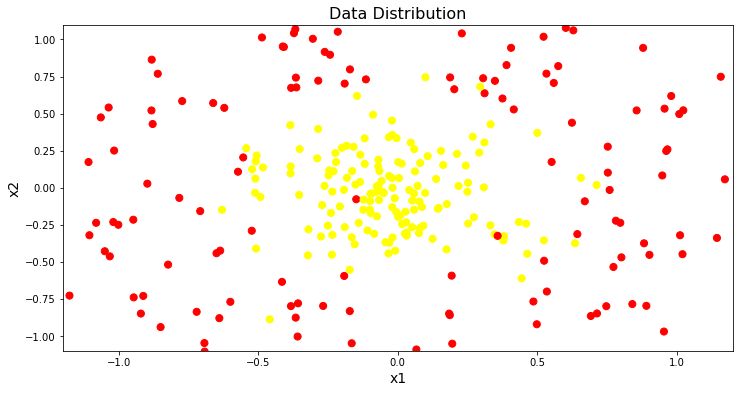

In [3]:
X, y = make_circles(300, factor=0.1, noise=0.25)

plt.figure(figsize=(12, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.title("Data Distribution", fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
plt.axis([-1.2, 1.2, -1.1, 1.1])
plt.show()

## Split Data into Train-Test Set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Create A Scatter Plot of Train and Test Data 

On the same figure plot both the train and test data. 

To separately show the test data, use black "edgecolors" and slightly bigger marker size (using the "s" parameter).

More info on the parameters of matplotlib scatter plot.

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

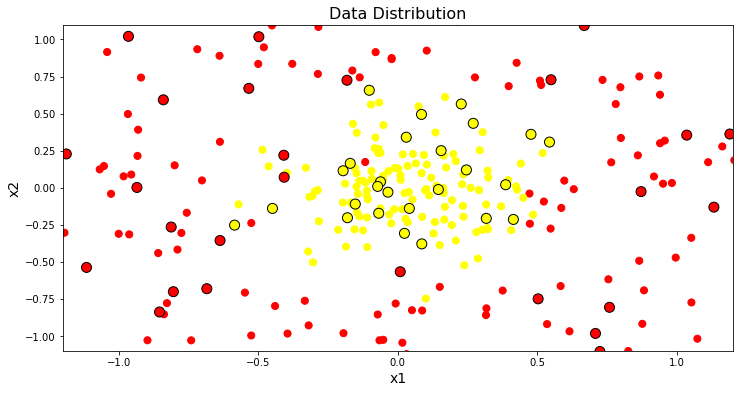

In [12]:
plt.figure(figsize=(12, 6))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, edgecolors='black', cmap='autumn')

plt.title("Data Distribution", fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
plt.axis([-1.2, 1.2, -1.1, 1.1])
plt.show()

## Task 1 

Train a linear model.

- Compute Training accuracy
- Plot the decision boundary using two functions (there should be two plots)
- Compute test accuracy, confusion matrix, precision, recall, f1 score and classification report

In [32]:
%%time
# Find the optimal model
param_grid = {'solver': ['liblinear', 'newton-cg', 'lbfgs'], 
              'tol': [1e-3, 1e-4], 'max_iter':[100, 500, 1000],'C': [0.1, 0.5, 1, 1.5, 2, 50, 100]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_train, y_train)

params_optimal = lg_reg_cv.best_params_

print("Best Score (F1 score): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

Fitting 3 folds for each of 126 candidates, totalling 378 fits
Best Score (F1 score): 0.475230
Optimal Hyperparameter Values:  {'C': 50, 'max_iter': 100, 'solver': 'liblinear', 'tol': 0.001}


Wall time: 4.8 s


In [33]:
# Train the optimal classifier
lg_reg_clf = LogisticRegression(**params_optimal)

lg_reg_clf.fit(X_train, y_train)

LogisticRegression(C=50, solver='liblinear', tol=0.001)

In [34]:
# Compute train accuracy
y_train_predicted = lg_reg_clf.predict(X_train)


accuracy_score_train = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", accuracy_score_train)


Train Accuracy:  0.49583333333333335


In [35]:
# Plot decision boundary
def decision_boundary_equation_based(clf, X):
    
    xmin, xmax = X.min() - 1, X.max() + 1
    
    w = clf.coef_[0] # We use index 0 to return a list from a 1 x 2 coef_ matrix
    b = clf.intercept_[0] 

    x1 = np.linspace(xmin, xmax, 100)
    decision_boundary = -(b + w[0]*x1)/w[1]
    plt.plot(x1, decision_boundary, "k--", linewidth=3)

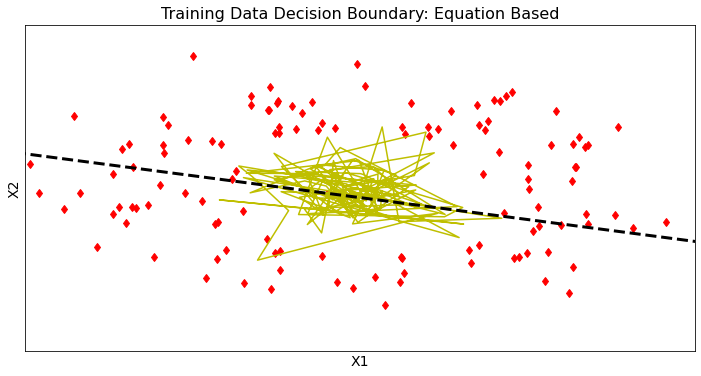

In [36]:
plt.figure(figsize=(12, 6))

plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "rd")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "y")

decision_boundary_equation_based(lg_reg_clf, X_train)

plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.title("Training Data Decision Boundary: Equation Based", fontsize=16)
plt.xlim([-1.5,1.5])
plt.ylim([-2,2])
plt.xticks([])
plt.yticks([])
plt.show()

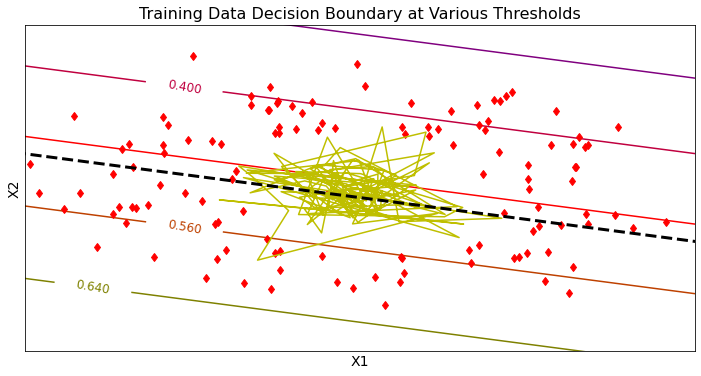

In [38]:
# Decision boundaries for various thresholds
plt.figure(figsize=(12, 6))

plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "rd")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "y")

# Contour plot representing class probabilities at various thresholds
decision_boundary_various_thresholds(lg_reg_clf, X_train)

# Equation-based decision boundary
decision_boundary_equation_based(lg_reg_clf, X_train)

plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.title("Training Data Decision Boundary at Various Thresholds", fontsize=16)
plt.xlim([-1.5,1.5])
plt.ylim([-2,2])
plt.xticks([])
plt.yticks([])
plt.show()

No handles with labels found to put in legend.


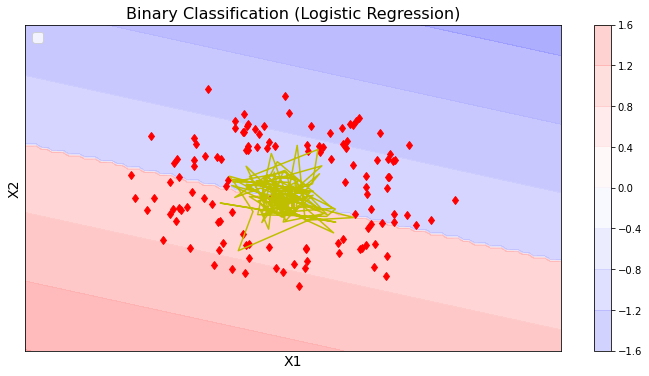

In [39]:
plt.figure(figsize=(12, 6))    

decision_boundary_class_colored(lg_reg_clf, X_train, plotDistanceFromHyperplane=True)

plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "rd")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "y")

plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("Binary Classification (Logistic Regression)", fontsize=16)
plt.xticks(())
plt.yticks(())
plt.show()

In [41]:
# Compute test performance
y_test_predicted = lg_reg_clf.predict(X_test)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)

f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Test Accuracy:  0.38333333333333336

Test Confusion Matrix:
[[11 16]
 [21 12]]

Test Precision = 0.428571
Test Recall = 0.363636
Test F1 Score = 0.393443

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.41      0.37        27
           1       0.43      0.36      0.39        33

    accuracy                           0.38        60
   macro avg       0.39      0.39      0.38        60
weighted avg       0.39      0.38      0.38        60



## Task 2 

- Choose the optimal polynomial model.

        -- Split the training data into training and validation fold (80%-20%). Vary the degree of the polynomial and train the Logistic Regression model using the training fold data. Then, compute the accuracy (use the "score" function) for the validation fold data using the models with varying degree. Finally, plot the accuracy values against the varying degree. From this plot find the optimal degree (that gives the highest validation fold accuracy).

- Train the optimal polynomial model
- Compute Training accuracy
- Plot the decision boundary using two functions (there should be two plots)
- Compute test accuracy, confusion matrix, precision, recall, f1 score and classification report




### Choose the Optimal Polynomial Model

You may vary the degree of the polynomial from 2 to 20.

Try the "liblinear" solver.

It is good to vary the hyperparameter "C" to see how it influences the test accuracy. For me "C=1" worked well.

#### Split Training data into Traing and Validation Fold

In [5]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

#### Model Selection: Optimal Polynomial Degree 

In [24]:
for i in range(1,21):
    poly = PolynomialFeatures(degree = i, interaction_only=False, include_bias=False)
    lr = LogisticRegression(solver='liblinear',C=1)
    pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
    pipe.fit(X_train1, y_train1)
    poly_score=pipe.score(X_val, y_val)
    print('Polynomial',i, 'score: ',poly_score)

Polynomial 1 score:  0.5625
Polynomial 2 score:  0.9375
Polynomial 3 score:  0.9375
Polynomial 4 score:  0.9166666666666666
Polynomial 5 score:  0.9166666666666666
Polynomial 6 score:  0.9166666666666666
Polynomial 7 score:  0.9166666666666666
Polynomial 8 score:  0.9166666666666666
Polynomial 9 score:  0.9166666666666666
Polynomial 10 score:  0.9166666666666666
Polynomial 11 score:  0.9166666666666666
Polynomial 12 score:  0.9166666666666666
Polynomial 13 score:  0.9166666666666666
Polynomial 14 score:  0.9166666666666666
Polynomial 15 score:  0.9166666666666666
Polynomial 16 score:  0.9166666666666666
Polynomial 17 score:  0.9166666666666666
Polynomial 18 score:  0.9166666666666666
Polynomial 19 score:  0.9166666666666666
Polynomial 20 score:  0.9166666666666666


## Choose the Best Model 

- Train the optimal polynomial model
- Compute Training accuracy
- Plot the decision boundary using two functions (there should be two plots)
- Compute test accuracy, confusion matrix, precision, recall, f1 score and classification report

In [25]:
# Optimal polynomial model is 2 or 3
poly = PolynomialFeatures(degree = 3, interaction_only=False, include_bias=False)
lr = LogisticRegression(solver='liblinear',C=1)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('logistic_regression',
                 LogisticRegression(C=1, solver='liblinear'))])

In [26]:
# Compute train accuracy
y_train_predicted = pipe.predict(X_train)


accuracy_score_train = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", accuracy_score_train)


Train Accuracy:  0.9541666666666667


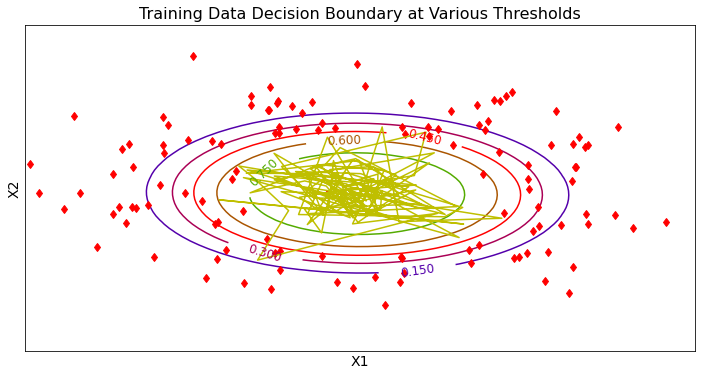

In [30]:
# Decision boundaries for various thresholds
plt.figure(figsize=(12, 6))

plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "rd")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "y")

# Contour plot representing class probabilities at various thresholds
decision_boundary_various_thresholds(pipe, X_train)

plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.title("Training Data Decision Boundary at Various Thresholds", fontsize=16)
plt.xlim([-1.5,1.5])
plt.ylim([-2,2])
plt.xticks([])
plt.yticks([])
plt.show()

No handles with labels found to put in legend.


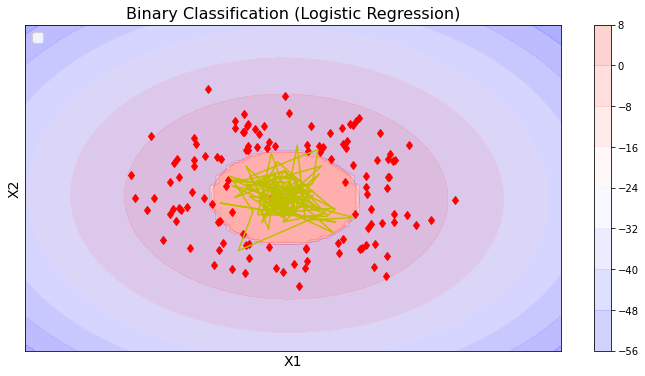

In [40]:
plt.figure(figsize=(12, 6))    

decision_boundary_class_colored(pipe, X_train, plotDistanceFromHyperplane=True)

plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "rd")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "y")

plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("Binary Classification (Logistic Regression)", fontsize=16)
plt.xticks(())
plt.yticks(())
plt.show()

In [42]:
# Compute test performance
y_test_predicted = pipe.predict(X_test)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)

f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Test Accuracy:  0.9

Test Confusion Matrix:
[[22  5]
 [ 1 32]]

Test Precision = 0.864865
Test Recall = 0.969697
Test F1 Score = 0.914286

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.86      0.97      0.91        33

    accuracy                           0.90        60
   macro avg       0.91      0.89      0.90        60
weighted avg       0.91      0.90      0.90        60



# Observations 

- Summarize your observations from the two tasks
- What type of decision boundary (linear/non-linear) is created by your polynomial model? Explain.

The linear model does not fit well to the nonlinear data. In fact, the test performance is slightly lower than how a completely random binary classifier would perform (<50% accuracy). However, the polynomial model of polynomial 3 fits very well to the data. A model of polynomial 2 would also have performed very well.

The decision boundary created by the polynomial model is nonlinear. We have visualized this in two dimensions in the decision boundary plots. The equations to "draw" the decision boundaries are clearly nonlinear, as the decision boundaries are not a straight line. 